<a href="https://colab.research.google.com/github/Amna9191/DSA210_TermProject/blob/main/DSA210TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Extract Data from html file and save to csv

import csv
from bs4 import BeautifulSoup
import os
import re
from datetime import datetime

# Function to export music history to a CSV file
def save_music_history_to_csv(music_history, output_file='music_history.csv'):
    headers = ['Song Title', 'Song URL', 'Artist', 'Date', 'Time']  # Added 'Date' and 'Time'

    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()  # Write the header row
        for entry in music_history:
            writer.writerow({
                'Song Title': entry['song_title'],
                'Song URL': entry['song_url'],
                'Artist': entry['channel_name'],
                'Date': entry['date'],
                'Time': entry['time']
            })

    print(f"Music history successfully exported to {output_file}")

# Function to load and parse the HTML file
def load_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'lxml')
    return soup

# Function to extract YouTube Music history
def extract_youtube_music_history(soup):
    music_history = []

    music_entries = soup.find_all('div', class_='outer-cell mdl-cell mdl-cell--12-col mdl-shadow--2dp')

    for entry in music_entries:
        header = entry.find('p', class_='mdl-typography--title')
        if header and 'YouTube Music' in header.text.strip():
            song_tag = entry.find('a', href=True)
            if song_tag:
                song_title = song_tag.text.strip()
                song_url = song_tag.get('href')

                channel_tag = song_tag.find_next('a', href=True)
                if channel_tag:
                    channel_name = channel_tag.text.strip().replace(" - Topic", "")

                timestamp_tag = entry.find('div', class_='content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1')
                if timestamp_tag:
                    timestamp_full = timestamp_tag.text.strip()
                    match = re.search(r'((Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},\s\d{4}),\s([\d:]+\s[AP]M)\sGMT[+\-]\d{2}:\d{2}', timestamp_full)
                    if match:
                        date_full = match.group(1)  # Extract the full date
                        time_12hr = match.group(3)  # Extract the 12-hour format time

                        # Convert 12-hour format to 24-hour format
                        time_24hr = datetime.strptime(time_12hr, '%I:%M:%S %p').strftime('%H:%M:%S')
                        date = datetime.strptime(date_full, '%b %d, %Y').strftime('%d %b %Y')  # Format date to include day, month, and year
                    else:
                        date = "No date found"
                        time_24hr = "No time found"
                else:
                    date = "No date found"
                    time_24hr = "No time found"

                music_history.append({
                    'song_title': song_title,
                    'song_url': 'https://music.youtube.com' + song_url,
                    'channel_name': channel_name,
                    'date': date,
                    'time': time_24hr
                })

    return music_history

# Function to display or process the data
def print_music_history(music_history):
    for entry in music_history:
        print(f"Song Title: {entry['song_title']}")
        print(f"Song URL: {entry['song_url']}")
        print(f"Artist: {entry['channel_name']}")
        print(f"Date: {entry['date']}")
        print(f"Time: {entry['time']}")
        print("-" * 40)

In [2]:
# Function to filter songs by date range and save to a new CSV
def filter_songs_by_date_range(input_file, output_file, start_date, end_date):
    try:
        # Convert start and end dates to datetime objects
        start_date = datetime.strptime(start_date, '%d %b %Y')
        end_date = datetime.strptime(end_date, '%d %b %Y')

        filtered_songs = []

        # Read the input CSV file
        with open(input_file, mode='r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            for row in reader:
                song_date = datetime.strptime(row['Date'], '%d %b %Y')
                if start_date <= song_date <= end_date:
                    filtered_songs.append(row)

        # Write the filtered songs to the new CSV file
        with open(output_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=['Song Title', 'Song URL', 'Artist', 'Date', 'Time'])
            writer.writeheader()
            writer.writerows(filtered_songs)

        print(f"Filtered songs successfully saved to {output_file}")

    except Exception as e:
        print(f"An error occurred: {e}")


In [3]:
file_path = 'watch-history.html'  # Path to your HTML file

if os.path.exists(file_path):
    soup = load_html(file_path)  # Load and parse the HTML file
    music_history = extract_youtube_music_history(soup)  # Extract music history

    if music_history:
        #print_music_history(music_history)  # Display data (optional)
        save_music_history_to_csv(music_history, 'music_history.csv')  # Save to CSV
    else:
        print("No YouTube Music history found in the provided HTML file.")
else:
    print(f"File not found: {file_path}")

Music history successfully exported to music_history.csv


In [4]:
# Filter history by dates
filter_songs_by_date_range(
  input_file='music_history.csv',
  output_file='filtered_music_history.csv',
  start_date='01 Sep 2024',
  end_date='31 Dec 2024'
)

Filtered songs successfully saved to filtered_music_history.csv


In [5]:
import csv
from datetime import datetime

# Function to sort a CSV file by date and time
def sort_csv_by_date_and_time(input_file, output_file='sorted_music_history.csv'):
    try:
        # Read the CSV file
        with open(input_file, mode='r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            rows = list(reader)  # Read all rows as a list of dictionaries

        # Ensure 'Date' and 'Time' columns exist
        if 'Date' not in rows[0] or 'Time' not in rows[0]:
            print("The input CSV file must contain 'Date' and 'Time' columns.")
            return

        # Sort rows by date and time
        sorted_rows = sorted(
            rows,
            key=lambda x: (datetime.strptime(x['Date'], '%d %b %Y'), datetime.strptime(x['Time'], '%H:%M:%S'))
        )

        # Write the sorted data to a new CSV file
        with open(output_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=reader.fieldnames)
            writer.writeheader()  # Write the header
            writer.writerows(sorted_rows)  # Write sorted rows

        print(f"Sorted CSV successfully saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found: {input_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    input_csv = "filtered_music_history.csv"  # Replace with your file path
    sort_csv_by_date_and_time(input_csv, "sorted_music_history.csv")


Sorted CSV successfully saved to sorted_music_history.csv


In [6]:
from datetime import datetime, timedelta
import csv

# Function to calculate song duration based on the start time of the next song
def calculate_duration(start_time_str, next_start_time_str):
    # Parse the start times
    start_time = datetime.strptime(start_time_str, '%H:%M:%S')
    next_start_time = datetime.strptime(next_start_time_str, '%H:%M:%S')

    # Calculate the duration as the difference between the next song's start time and the current song's start time
    duration = next_start_time - start_time
    return duration

# Function to format timedelta as "minutes:seconds"
def format_duration(duration):
    # Convert timedelta to minutes and seconds format (MM:SS)
    total_seconds = int(duration.total_seconds())
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes}:{seconds:02d}"

# Function to calculate the average duration of valid durations
def calculate_average_duration(durations):
    total_duration = sum(durations, timedelta())
    average_duration = total_duration / len(durations)
    return average_duration

# Update the CSV processing to include a "Duration" column
def add_duration_to_csv(input_file, output_file='music_with_duration.csv'):
    try:
        # Read the CSV file
        with open(input_file, mode='r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            rows = list(reader)  # Read all rows as a list of dictionaries

        # Ensure 'Time' column exists
        if 'Time' not in rows[0]:
            print("The input CSV file must contain a 'Time' column.")
            return

        # Collect valid durations
        valid_durations = []
        updated_rows = []  # This will hold rows with valid durations

        for i in range(len(rows) - 1):
            current_song = rows[i]
            next_song = rows[i + 1]

            # If the song title is a URL, set it to "Unknown"
            if current_song['Song Title'].startswith('https'):
                current_song['Song Title'] = "Unknown"

            current_start_time = current_song['Time']
            next_start_time = next_song['Time']

            # Calculate the duration of the current song based on the next song's start time
            duration = calculate_duration(current_start_time, next_start_time)

            # Check if duration is valid
            if timedelta(seconds=0) <= duration <= timedelta(minutes=7):
                valid_durations.append(duration)

        # Calculate the average duration of valid durations
        average_duration = calculate_average_duration(valid_durations)

        for i in range(len(rows) - 1):
            current_song = rows[i]
            next_song = rows[i + 1]

            current_start_time = current_song['Time']
            next_start_time = next_song['Time']

            duration = calculate_duration(current_start_time, next_start_time)

            # Set invalid durations to average duration
            if duration > timedelta(minutes=7) or duration < timedelta(seconds=0):
                duration = average_duration

            formatted_duration = format_duration(duration)  # Format the duration as MM:SS

            current_song['Duration'] = formatted_duration
            updated_rows.append(current_song)

        # For the last song, set the duration as "Unknown"
        rows[-1]['Duration'] = "Unknown"
        updated_rows.append(rows[-1])  # Add the last song

        # Write the updated data to a new CSV file
        with open(output_file, mode='w', newline='', encoding='utf-8') as file:
            fieldnames = reader.fieldnames + ['Duration']
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()  # Write the header
            writer.writerows(updated_rows)  # Write updated rows

        print(f"CSV with song durations saved to {output_file}")

    except FileNotFoundError:
        print(f"File not found: {input_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    input_csv = "sorted_music_history.csv"  # Replace with your file path
    add_duration_to_csv(input_csv, "music_with_duration.csv")


CSV with song durations saved to music_with_duration.csv


In [7]:
import csv
from datetime import timedelta

# Function to convert duration from 'MM:SS' to seconds
def duration_to_seconds(duration):
    try:
        minutes, seconds = map(int, duration.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return 0  # Skip invalid durations

# Initialize a dictionary to store listening time per day
listening_time_per_day = {}

# Read the CSV file
csv_file_path = "music_with_duration.csv"  # Replace with your actual file path
with open(csv_file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        date = row['Date']
        duration = row['Duration']
        seconds = duration_to_seconds(duration)

        if date in listening_time_per_day:
            listening_time_per_day[date] += seconds
        else:
            listening_time_per_day[date] = seconds

# Convert seconds back to hours, minutes, and seconds
listening_time = {
    date: str(timedelta(seconds=seconds))
    for date, seconds in listening_time_per_day.items()
}

print(listening_time)

{'04 Sep 2024': '0:40:43', '05 Sep 2024': '2:36:15', '06 Sep 2024': '1:14:24', '07 Sep 2024': '3:04:59', '09 Sep 2024': '0:34:09', '10 Sep 2024': '1:29:02', '11 Sep 2024': '3:03:26', '12 Sep 2024': '3:09:59', '13 Sep 2024': '1:02:06', '15 Sep 2024': '0:14:36', '16 Sep 2024': '0:31:24', '18 Sep 2024': '0:50:09', '19 Sep 2024': '0:22:10', '20 Sep 2024': '2:07:33', '21 Sep 2024': '3:04:31', '22 Sep 2024': '1:32:08', '23 Sep 2024': '3:14:16', '24 Sep 2024': '1:35:10', '25 Sep 2024': '0:36:30', '26 Sep 2024': '0:41:29', '27 Sep 2024': '0:06:11', '28 Sep 2024': '0:34:19', '29 Sep 2024': '0:46:42', '30 Sep 2024': '2:03:42', '01 Oct 2024': '1:01:15', '02 Oct 2024': '0:44:37', '03 Oct 2024': '3:07:37', '04 Oct 2024': '1:29:44', '19 Oct 2024': '2:17:13', '20 Oct 2024': '1:49:00', '21 Oct 2024': '1:07:17', '22 Oct 2024': '0:29:41', '23 Oct 2024': '3:24:34', '24 Oct 2024': '0:23:38', '25 Oct 2024': '1:04:04', '26 Oct 2024': '0:31:54', '27 Oct 2024': '0:28:25', '28 Oct 2024': '1:12:37', '29 Oct 202

In [8]:
from datetime import datetime, timedelta

# Dictionary to store listening time per month
listening_time_per_month = {}

# Aggregate daily listening times into monthly listening times
for date, seconds in listening_time_per_day.items():
    # Parse the date and extract the month and year
    date_obj = datetime.strptime(date, '%d %b %Y')  # Adjust format to match your CSV's date format
    month_year = date_obj.strftime('%b %Y')  # Format as "Month Year" (e.g., "Jan 2024")

    # Add the daily listening time to the monthly total
    if month_year in listening_time_per_month:
        listening_time_per_month[month_year] += int(seconds)
    else:
        listening_time_per_month[month_year] = int(seconds)

# Convert seconds back to hours, minutes, and seconds for each month
listening_time_monthly = {
    month_year: str(timedelta(seconds=seconds))
    for month_year, seconds in listening_time_per_month.items()
}

# Print the listening time for each month
for month, time in listening_time_monthly.items():
    print(f"{month}: {time}")


Sep 2024: 1 day, 11:15:53
Oct 2024: 1 day, 5:07:09
Nov 2024: 1 day, 5:34:44
Dec 2024: 8:27:32


In [71]:
from datetime import datetime, timedelta

# Date when the decision was made
decision_date = datetime.strptime('12 Nov 2024', '%d %b %Y')

# Separate listening times into before and after the decision date
before_decision = {}
after_decision = {}

for date, seconds in listening_time_per_day.items():
    date_obj = datetime.strptime(date, '%d %b %Y')  # Parse the date
    if date_obj < decision_date:
        before_decision[date] = seconds
    else:
        after_decision[date] = seconds

# Function to calculate average daily and weekly listening times
def calculate_averages(listening_data):
    total_seconds = sum(listening_data.values())
    total_days = len(listening_data)
    average_daily = total_seconds / total_days if total_days > 0 else 0

    # Calculate weekly average (7-day chunks)
    average_weekly = total_seconds / (total_days / 7) if total_days > 0 else 0
    return average_daily, average_weekly

# Calculate averages for before and after the decision
avg_daily_before, avg_weekly_before = calculate_averages(before_decision)
avg_daily_after, avg_weekly_after = calculate_averages(after_decision)

# Convert seconds to HH:MM:SS for display
def format_time(seconds):
    return str(timedelta(seconds=int(seconds)))

print("Before Decision:")
print(f"  Average Daily Listening Time: {format_time(avg_daily_before)}")
print(f"  Average Weekly Listening Time: {format_time(avg_weekly_before)}")

print("\nAfter Decision:")
print(f"  Average Daily Listening Time: {format_time(avg_daily_after)}")
print(f"  Average Weekly Listening Time: {format_time(avg_weekly_after)}")


Before Decision:
  Average Daily Listening Time: 1:40:20
  Average Weekly Listening Time: 11:42:22

After Decision:
  Average Daily Listening Time: 0:28:33
  Average Weekly Listening Time: 3:19:53


In [12]:
import pandas as pd
from datetime import datetime

# File path
file_path = 'MoodData.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Create a dictionary with 'Date' as key and 'Mood' as value
mood_dict = dict(zip(data['Date'], data['Mood']))

# Reformat the dates and update the dictionary
formatted_mood_dict = {
    datetime.strptime(date, "%d-%b").replace(year=2024).strftime("%d %b %Y"): mood
    for date, mood in mood_dict.items()
}

# Print the resulting dictionary
print(formatted_mood_dict)


{'12 Nov 2024': 4, '13 Nov 2024': 5, '14 Nov 2024': 2, '15 Nov 2024': 2, '16 Nov 2024': 1, '17 Nov 2024': 1, '18 Nov 2024': 0, '19 Nov 2024': 1, '20 Nov 2024': 1, '21 Nov 2024': 4, '22 Nov 2024': 1, '23 Nov 2024': 1, '24 Nov 2024': 5, '25 Nov 2024': 2, '26 Nov 2024': 1, '27 Nov 2024': 2, '28 Nov 2024': 2, '29 Nov 2024': 2, '30 Nov 2024': 3, '01 Dec 2024': 3, '02 Dec 2024': 3, '03 Dec 2024': 3, '04 Dec 2024': 2, '05 Dec 2024': 5, '06 Dec 2024': 3, '07 Dec 2024': 3, '08 Dec 2024': 4, '09 Dec 2024': 4, '10 Dec 2024': 3, '11 Dec 2024': 3, '12 Dec 2024': 4, '13 Dec 2024': 5, '14 Dec 2024': 3, '15 Dec 2024': 3, '16 Dec 2024': 4, '17 Dec 2024': 4, '18 Dec 2024': 4, '19 Dec 2024': 4, '20 Dec 2024': 3, '21 Dec 2024': 4, '22 Dec 2024': 3, '23 Dec 2024': 5, '24 Dec 2024': 4, '25 Dec 2024': 4, '26 Dec 2024': 5, '27 Dec 2024': 4, '28 Dec 2024': 5, '29 Dec 2024': 4, '30 Dec 2024': 4, '31 Dec 2024': 5}


In [14]:
# Get all unique dates from mood_dict
all_dates = formatted_mood_dict.keys()

# Create the new dictionary with listening time and mood
combined_dict = {
    date: (listening_time.get(date, '00:00:00'), formatted_mood_dict.get(date))
    for date in all_dates
}

# Print the result
print(combined_dict)

{'12 Nov 2024': ('1:14:50', 4), '13 Nov 2024': ('1:55:52', 5), '14 Nov 2024': ('00:00:00', 2), '15 Nov 2024': ('0:33:33', 2), '16 Nov 2024': ('00:00:00', 1), '17 Nov 2024': ('0:20:15', 1), '18 Nov 2024': ('0:02:25', 0), '19 Nov 2024': ('0:14:34', 1), '20 Nov 2024': ('00:00:00', 1), '21 Nov 2024': ('1:08:53', 4), '22 Nov 2024': ('00:00:00', 1), '23 Nov 2024': ('00:00:00', 1), '24 Nov 2024': ('2:06:46', 5), '25 Nov 2024': ('0:12:06', 2), '26 Nov 2024': ('0:06:13', 1), '27 Nov 2024': ('0:08:36', 2), '28 Nov 2024': ('0:11:23', 2), '29 Nov 2024': ('0:11:06', 2), '30 Nov 2024': ('0:13:57', 3), '01 Dec 2024': ('00:00:00', 3), '02 Dec 2024': ('00:00:00', 3), '03 Dec 2024': ('0:20:47', 3), '04 Dec 2024': ('00:00:00', 2), '05 Dec 2024': ('0:44:13', 5), '06 Dec 2024': ('0:25:00', 3), '07 Dec 2024': ('00:00:00', 3), '08 Dec 2024': ('0:25:29', 4), '09 Dec 2024': ('0:27:16', 4), '10 Dec 2024': ('00:00:00', 3), '11 Dec 2024': ('0:11:40', 3), '12 Dec 2024': ('0:17:55', 4), '13 Dec 2024': ('2:13:30', 5

In [70]:
import pandas as pd

# Load the CSV file
file_path = 'music_with_duration.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Filter out rows where the Song Title is "Unknown"
filtered_data = data[(data['Song Title'] != 'Unknown') & (data['Artist'] != 'Release')]

# Calculate the number of unique songs
unique_songs = filtered_data['Song Title'].nunique()
print(f"Number of unique songs: {unique_songs}")

# Calculate the top 5 most listened-to songs
top_songs = filtered_data['Song Title'].value_counts().head(5)
print("\nTop 5 most listened-to songs and their counts:")
print(top_songs)


# Calculate the top 3 artists
top_artists = filtered_data['Artist'].value_counts().head(5)
print("\nTop 3 artists and their counts:")
print(top_artists)

Number of unique songs: 1173

Top 5 most listened-to songs and their counts:
Song Title
Tere Sang Ishq Hua                                 21
O Maahi                                            20
Khoobsurat (From "Stree 2")                        19
Tainu Khabar Nahi (From "Munjya")                  18
Gore Gore Mukhde Pe (From "Ishq Vishk Rebound")    17
Name: count, dtype: int64

Top 3 artists and their counts:
Artist
Arijit Singh     137
Sachin Jigar      74
Vishal Mishra     70
Pritam            63
One Direction     59
Name: count, dtype: int64


Total Listening Time: 1028.02 minutes
Average Listening Time: 20.56 minutes
Average Listening Time per Mood:
Mood
0     2.416667
1     5.861905
2    10.961905
3     7.862500
4    20.403333
5    63.429167
Name: Listening Time (Minutes), dtype: float64
Correlation between Mood and Listening Time: 0.48


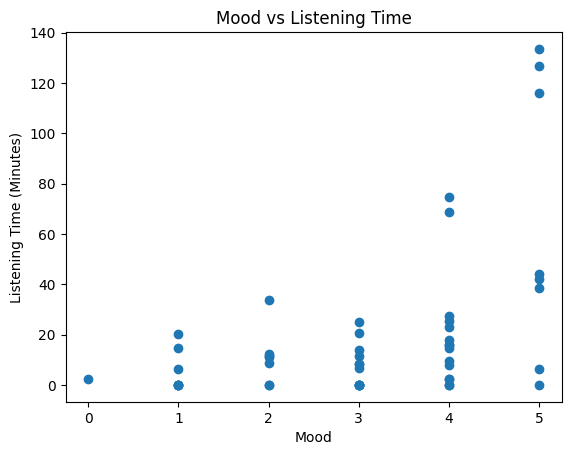

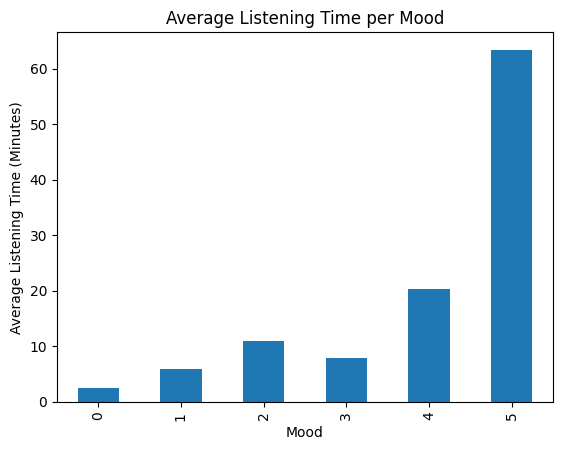

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrame
data = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['Listening Time', 'Mood'])

# Convert Listening Time to minutes
def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return h * 60 + m + s / 60

data['Listening Time (Minutes)'] = data['Listening Time'].apply(time_to_minutes)

# Summary Statistics
total_listening_time = data['Listening Time (Minutes)'].sum()
average_listening_time = data['Listening Time (Minutes)'].mean()
average_listening_per_mood = data.groupby('Mood')['Listening Time (Minutes)'].mean()

print(f"Total Listening Time: {total_listening_time:.2f} minutes")
print(f"Average Listening Time: {average_listening_time:.2f} minutes")
print("Average Listening Time per Mood:")
print(average_listening_per_mood)

# Correlation Analysis
correlation = data['Mood'].corr(data['Listening Time (Minutes)'])
print(f"Correlation between Mood and Listening Time: {correlation:.2f}")

# Visualization
# Scatter Plot
plt.scatter(data['Mood'], data['Listening Time (Minutes)'])
plt.title('Mood vs Listening Time')
plt.xlabel('Mood')
plt.ylabel('Listening Time (Minutes)')
plt.show()

# Bar Plot of Average Listening Time per Mood
average_listening_per_mood.plot(kind='bar', title='Average Listening Time per Mood', xlabel='Mood', ylabel='Average Listening Time (Minutes)')
plt.show()

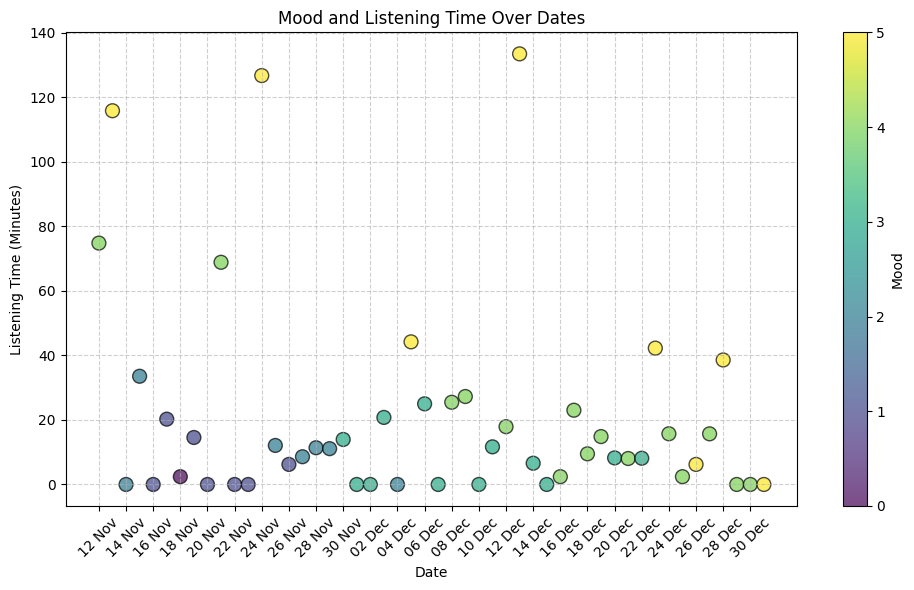

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert to DataFrame
data = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['Listening Time', 'Mood'])

# Convert Listening Time to minutes
def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return h * 60 + m + s / 60

data['Listening Time (Minutes)'] = data['Listening Time'].apply(time_to_minutes)
data['Date'] = pd.to_datetime(data.index)  # Convert index to datetime
data.sort_values('Date', inplace=True)  # Ensure dates are sorted

# Format dates for display
formatted_dates = data['Date'].dt.strftime('%d %b')

# Scatter Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Date'], data['Listening Time (Minutes)'], c=data['Mood'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='Mood')  # Add a colorbar for Mood
plt.title('Mood and Listening Time Over Dates')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')

# Set custom x-ticks: Show every 2nd date, for example
plt.xticks(data['Date'][::2], formatted_dates[::2], rotation=45)  # Only every 2nd date
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


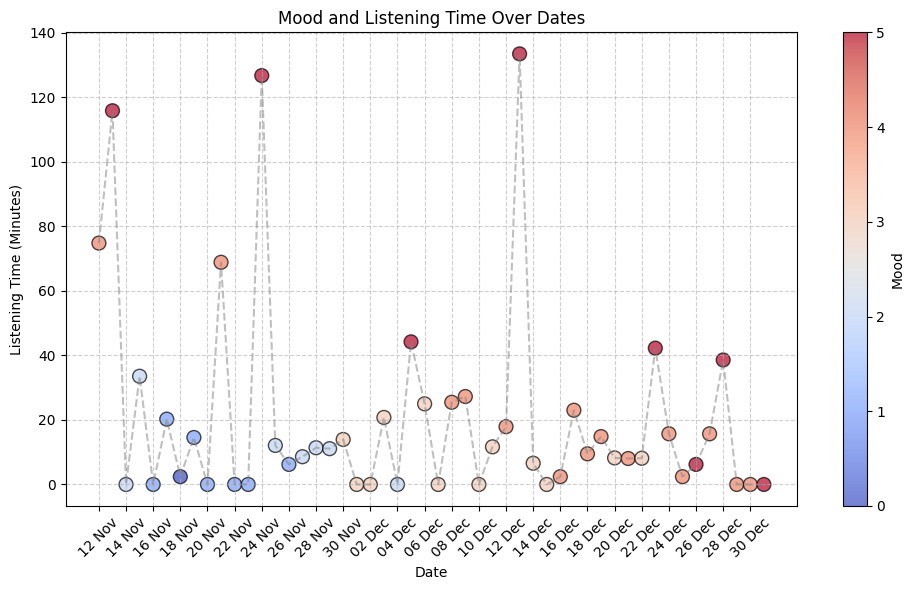

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Date'], data['Listening Time (Minutes)'], c=data['Mood'], cmap='coolwarm', s=100, edgecolor='k', alpha=0.7)
plt.plot(data['Date'], data['Listening Time (Minutes)'], color='grey', linestyle='--', alpha=0.5)  # Connect points with a line
plt.colorbar(scatter, label='Mood')  # Colorbar for mood
plt.title('Mood and Listening Time Over Dates')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')
plt.xticks(data['Date'][::2], formatted_dates[::2], rotation=45)  # Reduce x-axis labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


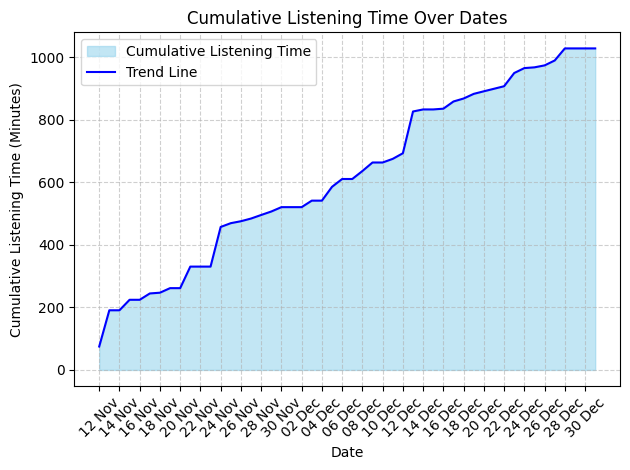

In [25]:
cumulative_listening = data['Listening Time (Minutes)'].cumsum()
plt.fill_between(data['Date'], cumulative_listening, color='skyblue', alpha=0.5, label='Cumulative Listening Time')
plt.plot(data['Date'], cumulative_listening, color='blue', label='Trend Line')
plt.title('Cumulative Listening Time Over Dates')
plt.xlabel('Date')
plt.ylabel('Cumulative Listening Time (Minutes)')
plt.xticks(data['Date'][::2], formatted_dates[::2], rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


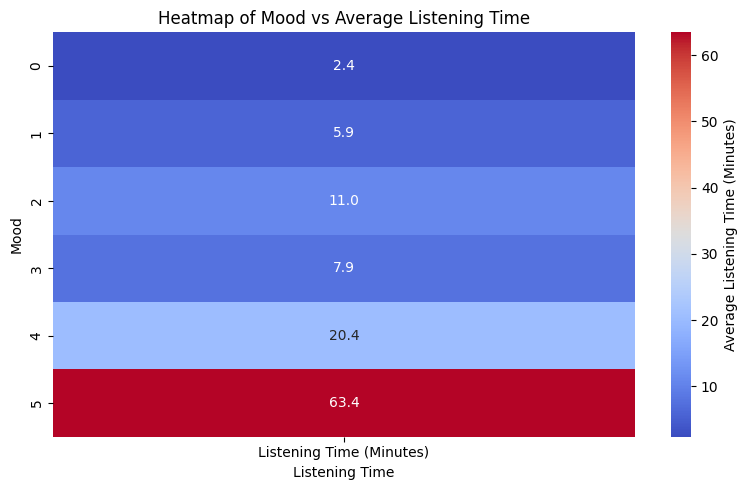

In [26]:
import seaborn as sns

# Create a pivot table of Mood vs Listening Time
heatmap_data = data.pivot_table(index='Mood', values='Listening Time (Minutes)', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Average Listening Time (Minutes)'})
plt.title('Heatmap of Mood vs Average Listening Time')
plt.xlabel('Listening Time')
plt.ylabel('Mood')
plt.tight_layout()
plt.show()


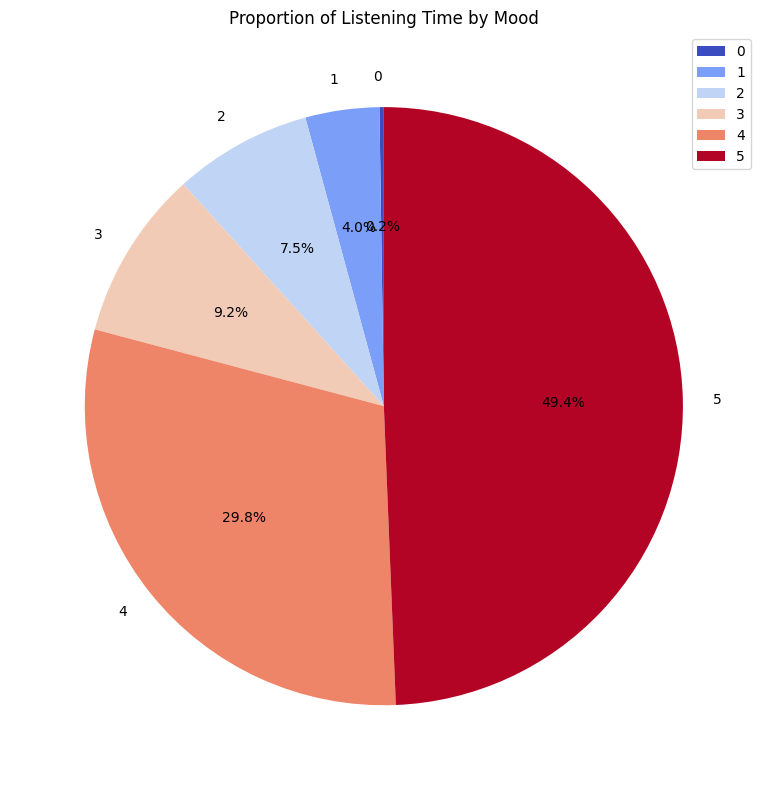

In [27]:
# Group by Mood and sum listening time
mood_listening = data.groupby('Mood')['Listening Time (Minutes)'].sum()

# Plot pie chart
mood_listening.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colormap='coolwarm', legend=True)
plt.title('Proportion of Listening Time by Mood')
plt.ylabel('')  # Remove y-label for a cleaner look
plt.tight_layout()
plt.show()


<ipython-input-28-5168ab4fb78c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mood', y='Listening Time (Minutes)', data=data, palette='coolwarm')


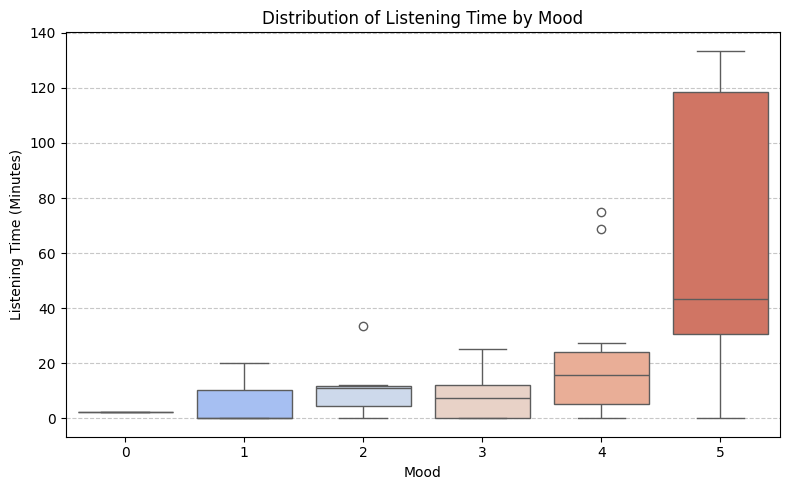

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Mood', y='Listening Time (Minutes)', data=data, palette='coolwarm')
plt.title('Distribution of Listening Time by Mood')
plt.xlabel('Mood')
plt.ylabel('Listening Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


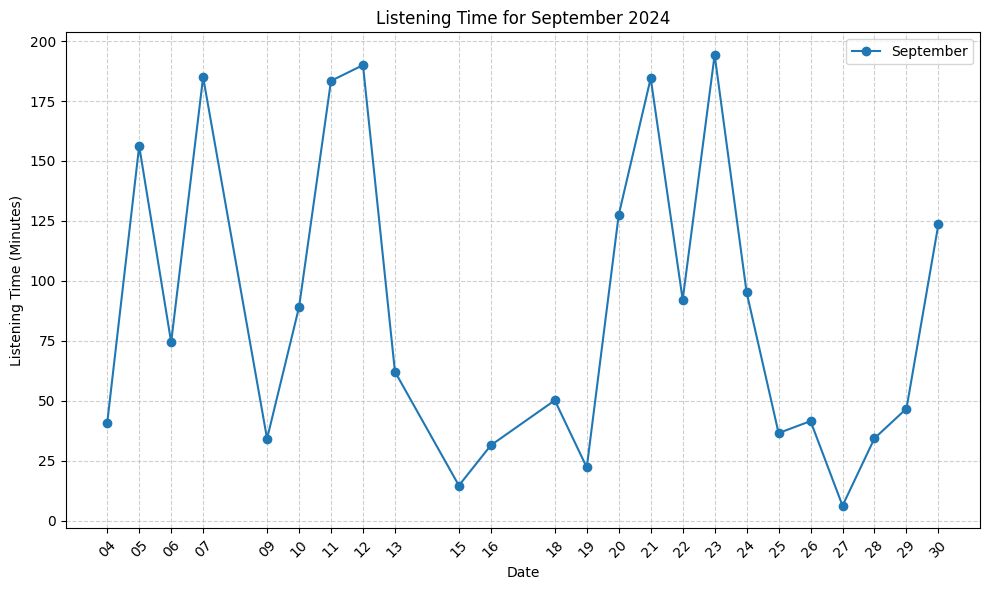

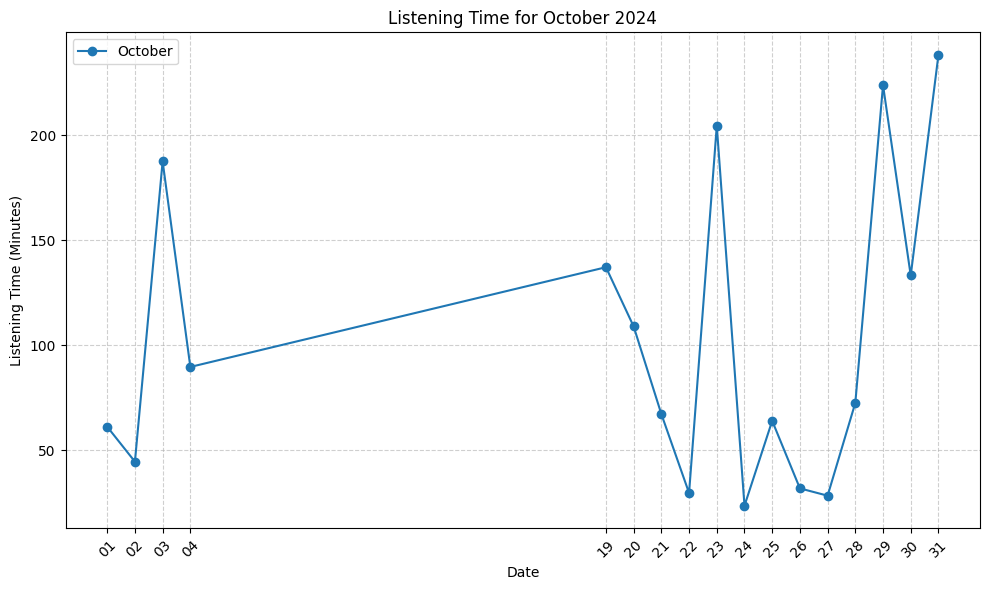

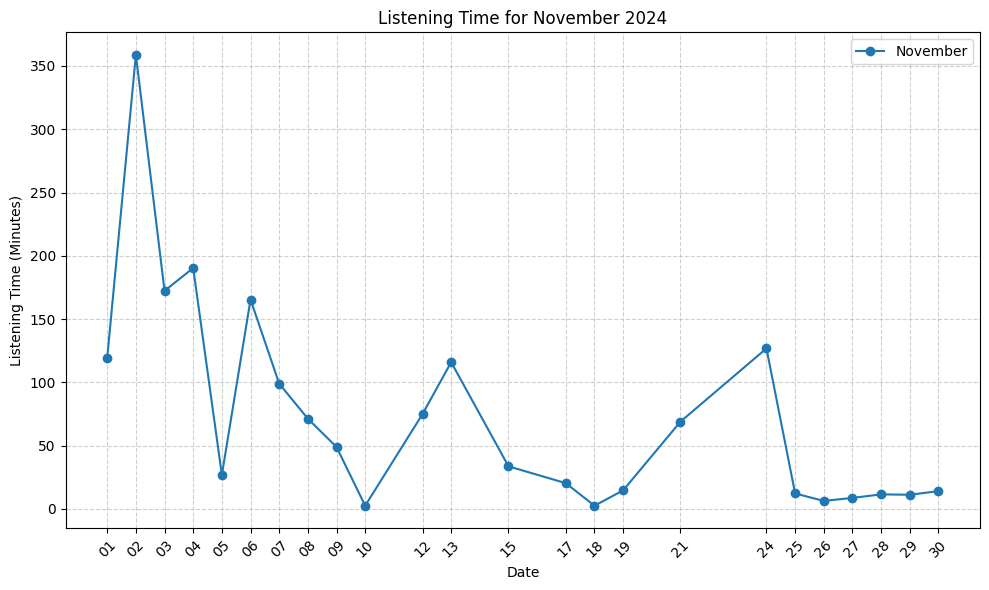

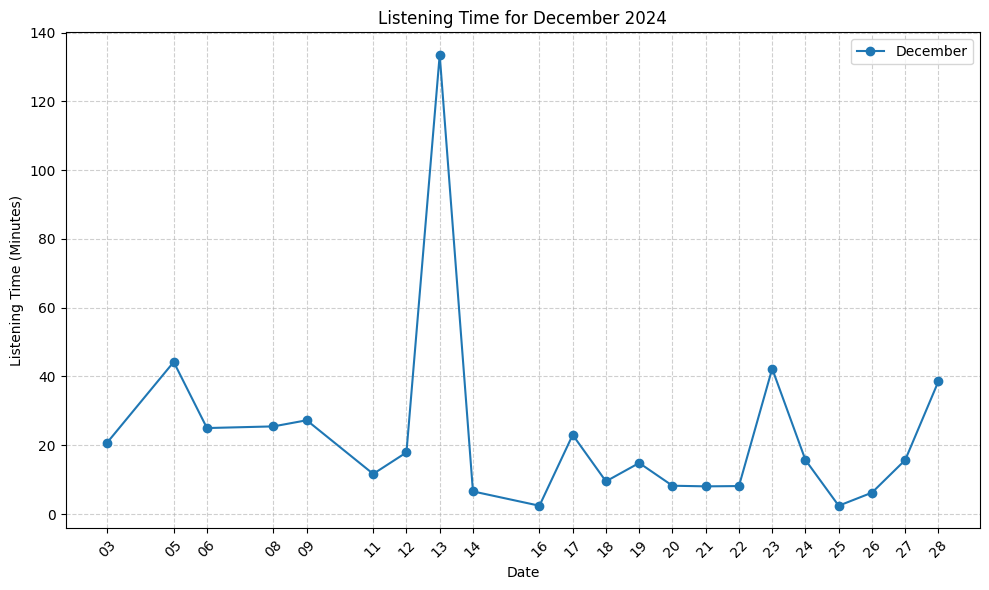

In [29]:
# Convert dictionary to DataFrame
data = pd.DataFrame.from_dict(listening_time, orient='index', columns=['Listening Time'])

# Convert Listening Time to minutes
def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return h * 60 + m + s / 60

data['Listening Time (Minutes)'] = data['Listening Time'].apply(time_to_minutes)
data['Date'] = pd.to_datetime(data.index)  # Convert index to datetime
data['Month'] = data['Date'].dt.strftime('%B')  # Extract month name
data['Day'] = data['Date'].dt.strftime('%d')  # Extract day for labeling

# Group by months
months = data['Month'].unique()

# Generate graphs for each month
for month in months:
    month_data = data[data['Month'] == month]

    # Plot listening time vs date
    plt.figure(figsize=(10, 6))
    plt.plot(month_data['Date'], month_data['Listening Time (Minutes)'], marker='o', label=f'{month}')
    plt.title(f'Listening Time for {month} 2024')
    plt.xlabel('Date')
    plt.ylabel('Listening Time (Minutes)')
    plt.xticks(month_data['Date'], month_data['Day'], rotation=45)  # Show day of the month on x-axis
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

<ipython-input-56-78629d7df888>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total = data.groupby('Month')['Listening Time (Minutes)'].sum()
<ipython-input-56-78629d7df888>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_average = data.groupby('Month')['Listening Time (Minutes)'].mean()


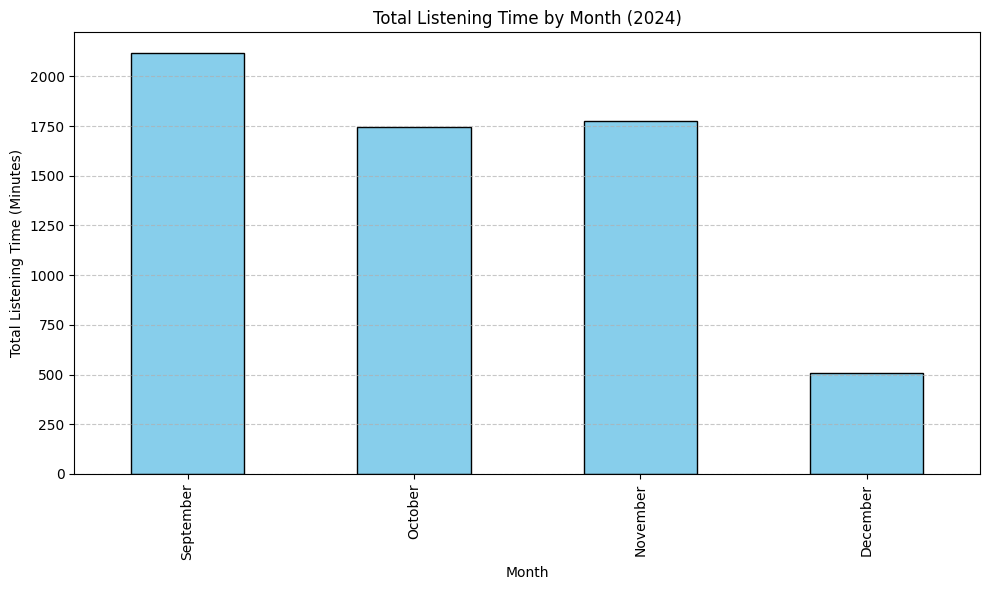

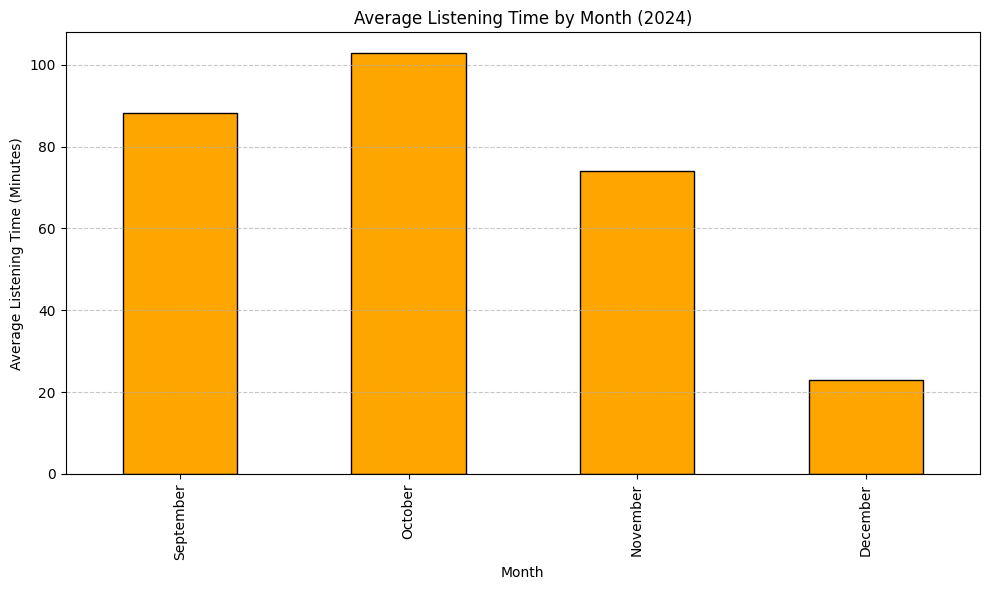

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct order for the available months
month_order = ['September', 'October', 'November', 'December']

# Convert dictionary to DataFrame
data = pd.DataFrame.from_dict(listening_time, orient='index', columns=['Listening Time'])

# Convert Listening Time to minutes
def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return h * 60 + m + s / 60

data['Listening Time (Minutes)'] = data['Listening Time'].apply(time_to_minutes)
data['Date'] = pd.to_datetime(data.index)  # Convert index to datetime
data['Month'] = pd.Categorical(data['Date'].dt.strftime('%B'), categories=month_order, ordered=True)

# Group by month and calculate total and average listening time
monthly_total = data.groupby('Month')['Listening Time (Minutes)'].sum()
monthly_average = data.groupby('Month')['Listening Time (Minutes)'].mean()

# Plot total listening time per month
plt.figure(figsize=(10, 6))
monthly_total.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Listening Time by Month (2024)')
plt.xlabel('Month')
plt.ylabel('Total Listening Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot average listening time per month
plt.figure(figsize=(10, 6))
monthly_average.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Listening Time by Month (2024)')
plt.xlabel('Month')
plt.ylabel('Average Listening Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Before 12th November - Total: 5117.28 minutes, Average: 100.34 minutes
After 12th November - Total: 1028.02 minutes, Average: 28.56 minutes


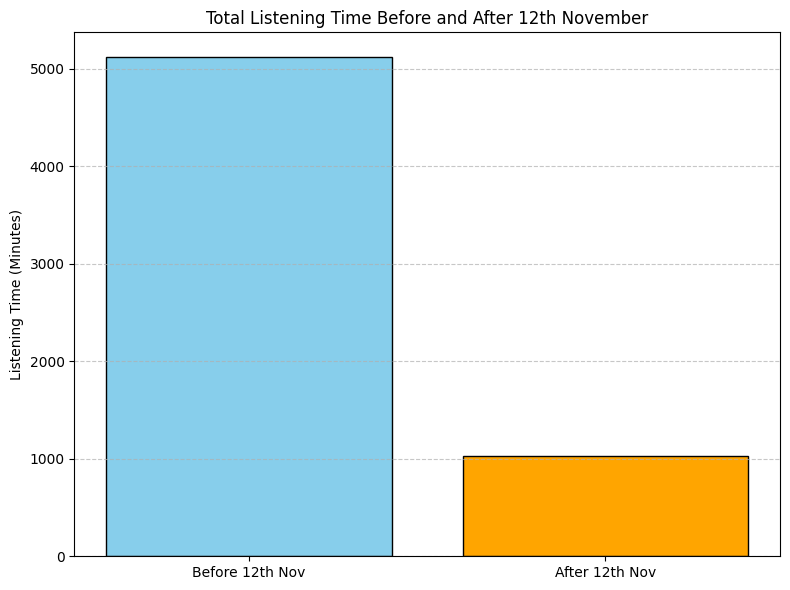

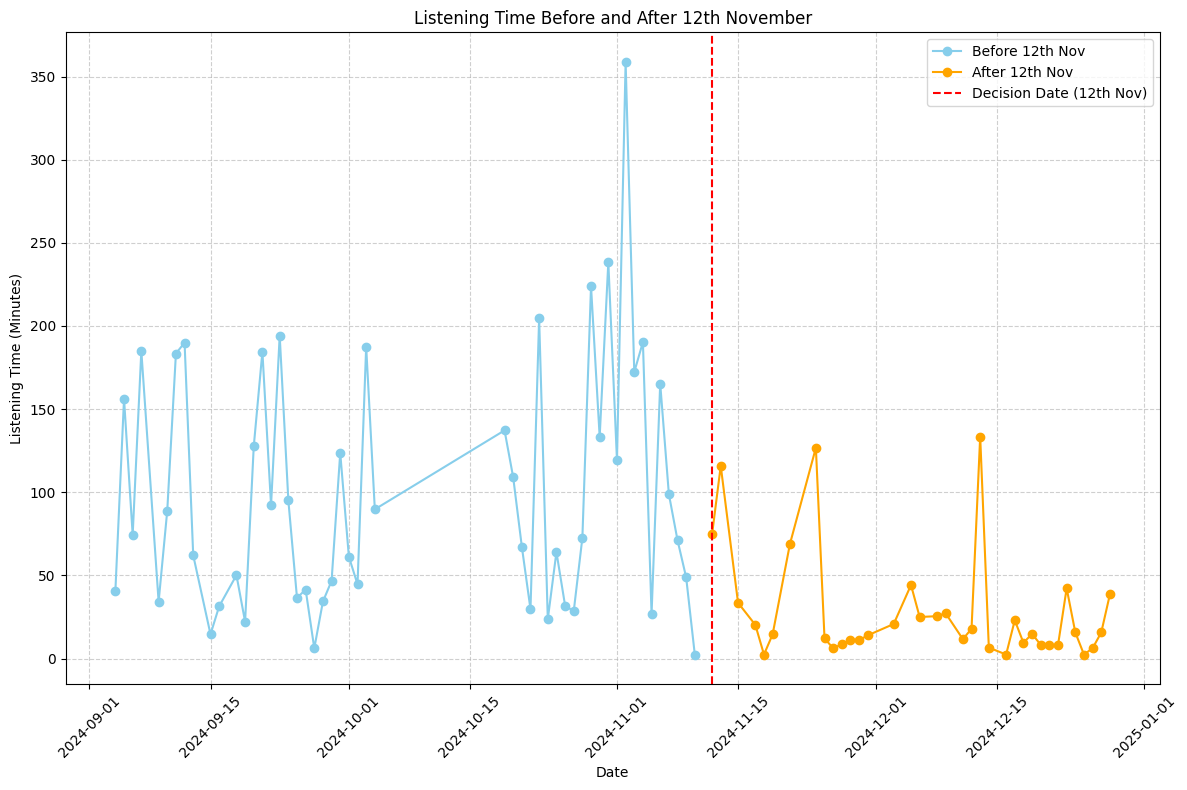

In [42]:
# Convert dictionary to DataFrame
data = pd.DataFrame.from_dict(listening_time, orient='index', columns=['Listening Time'])

# Convert Listening Time to minutes
def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return h * 60 + m + s / 60

data['Listening Time (Minutes)'] = data['Listening Time'].apply(time_to_minutes)
data['Date'] = pd.to_datetime(data.index)  # Convert index to datetime

# Split the data into "before" and "after" 12th November
decision_date = pd.Timestamp('2024-11-12')
before_data = data[data['Date'] < decision_date]
after_data = data[data['Date'] >= decision_date]

# Calculate total and average listening time for both periods
before_total = before_data['Listening Time (Minutes)'].sum()
after_total = after_data['Listening Time (Minutes)'].sum()
before_avg = before_data['Listening Time (Minutes)'].mean()
after_avg = after_data['Listening Time (Minutes)'].mean()

# Print the calculated values
print(f"Before 12th November - Total: {before_total:.2f} minutes, Average: {before_avg:.2f} minutes")
print(f"After 12th November - Total: {after_total:.2f} minutes, Average: {after_avg:.2f} minutes")

# Bar Plot for Total Listening Time
labels = ['Before 12th Nov', 'After 12th Nov']
totals = [before_total, after_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, totals, color=['skyblue', 'orange'], edgecolor='black')
plt.title('Total Listening Time Before and After 12th November')
plt.ylabel('Listening Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line Plot for Listening Time Over Time
plt.figure(figsize=(12, 8))
plt.plot(before_data['Date'], before_data['Listening Time (Minutes)'], label='Before 12th Nov', color='skyblue', marker='o')
plt.plot(after_data['Date'], after_data['Listening Time (Minutes)'], label='After 12th Nov', color='orange', marker='o')
plt.axvline(decision_date, color='red', linestyle='--', label='Decision Date (12th Nov)')
plt.title('Listening Time Before and After 12th November')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-59-dc6fbdc6cec8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Period', y='Listening Time (Minutes)', data=data, palette=custom_colors)


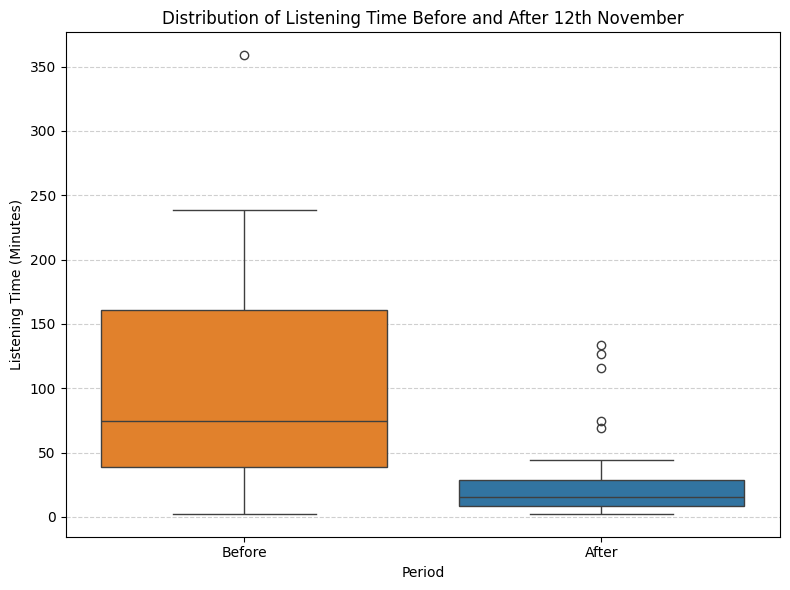

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a "Period" column to categorize data
data['Period'] = ['Before' if date < decision_date else 'After' for date in data['Date']]

# Define orange and blue colors
custom_colors = ['#FF7F0E', '#1F77B4']  # Orange for "Before", Blue for "After"

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Period', y='Listening Time (Minutes)', data=data, palette=custom_colors)
plt.title('Distribution of Listening Time Before and After 12th November')
plt.xlabel('Period')
plt.ylabel('Listening Time (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


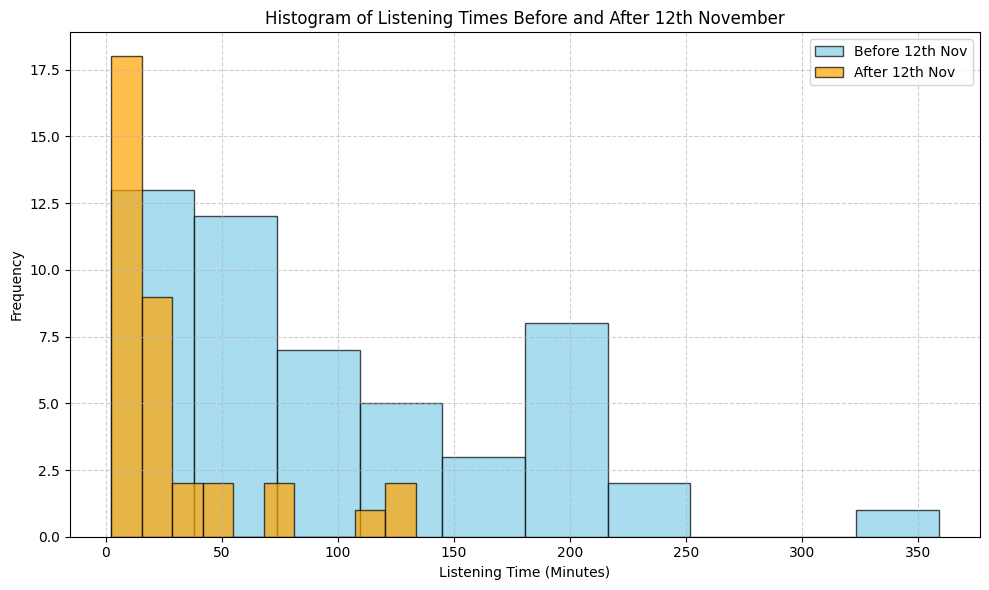

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(before_data['Listening Time (Minutes)'], bins=10, alpha=0.7, label='Before 12th Nov', color='skyblue', edgecolor='black')
plt.hist(after_data['Listening Time (Minutes)'], bins=10, alpha=0.7, label='After 12th Nov', color='orange', edgecolor='black')
plt.title('Histogram of Listening Times Before and After 12th November')
plt.xlabel('Listening Time (Minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-45-3f986a49b882>:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  before_poly = Polynomial.fit(before_data['Date'].view(int), before_data['Listening Time (Minutes)'], deg=1)
<ipython-input-45-3f986a49b882>:11: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  after_poly = Polynomial.fit(after_data['Date'].view(int), after_data['Listening Time (Minutes)'], deg=1)
<ipython-input-45-3f986a49b882>:12: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  plt.plot(before_data['Date'], before_poly(before_data['Date'].view(int)), color='blue', linestyle='--', label='Trend Before')
<ipython-input-45-3f986a49b882>:13: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an 

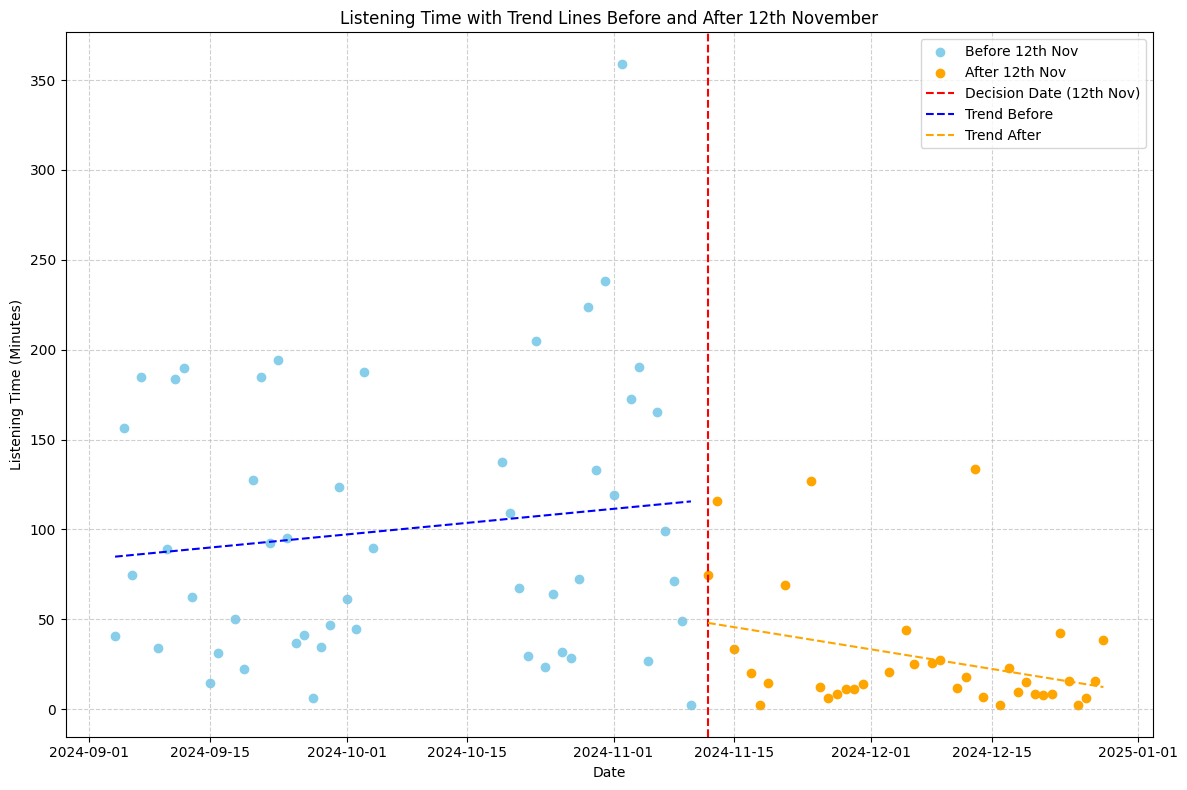

In [45]:
from numpy.polynomial.polynomial import Polynomial

# Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(before_data['Date'], before_data['Listening Time (Minutes)'], label='Before 12th Nov', color='skyblue')
plt.scatter(after_data['Date'], after_data['Listening Time (Minutes)'], label='After 12th Nov', color='orange')
plt.axvline(decision_date, color='red', linestyle='--', label='Decision Date (12th Nov)')

# Trend Lines
before_poly = Polynomial.fit(before_data['Date'].view(int), before_data['Listening Time (Minutes)'], deg=1)
after_poly = Polynomial.fit(after_data['Date'].view(int), after_data['Listening Time (Minutes)'], deg=1)
plt.plot(before_data['Date'], before_poly(before_data['Date'].view(int)), color='blue', linestyle='--', label='Trend Before')
plt.plot(after_data['Date'], after_poly(after_data['Date'].view(int)), color='orange', linestyle='--', label='Trend After')

plt.title('Listening Time with Trend Lines Before and After 12th November')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


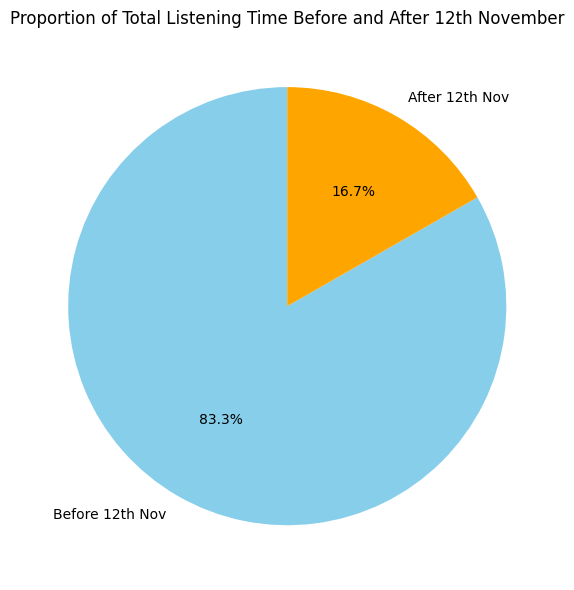

In [51]:
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie([before_total, after_total], labels=['Before 12th Nov', 'After 12th Nov'], autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Proportion of Total Listening Time Before and After 12th November')
plt.tight_layout()
plt.show()
